<a href="https://colab.research.google.com/github/priya170807/Time-seriesAnalysis/blob/main/Azure_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
data_path = '/content/sample_data/vmtable.csv'
headers=['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecount', 'vmmemory']
trace_dataframe = pd.read_csv(data_path, header=None, index_col=False,names=headers,delimiter=',')


#Compute VM Lifetime based on VM Created and VM Deleted timestamps and transform to Hour
trace_dataframe['lifetime'] = np.maximum((trace_dataframe['vmdeleted'] - trace_dataframe['vmcreated']),300)/ 3600
trace_dataframe['corehour'] = trace_dataframe['lifetime'] * trace_dataframe['vmcorecount']
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [ ]:
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,719.916667,719.916667
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,427.583333,427.583333
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,111.916667,111.916667
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,719.916667,5759.333333
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,607.916667,607.916667


In [ ]:
vm_count = trace_dataframe.shape[0]
subscription_count = trace_dataframe['subscriptionid'].unique().shape[0]
deployment_count = trace_dataframe['deploymentid'].unique().shape[0]
total_vm_hour_available = trace_dataframe['lifetime'].sum()
total_core_hour_available = trace_dataframe['corehour'].sum()

print("Total Number of Virtual Machines in the Dataset: %d" % vm_count)
print("Total Number of Subscriptions in the Dataset: %d" % subscription_count)
print("Total Number of Deployments in the Dataset: %d" % deployment_count)
print("Total VM Hours Available in the Dataset: %f" % total_vm_hour_available)
print("Total Core Hours Available in the Dataset: %f" % total_core_hour_available)

Total Number of Virtual Machines in the Dataset: 2013767
Total Number of Subscriptions in the Dataset: 5958
Total Number of Deployments in the Dataset: 35941
Total VM Hours Available in the Dataset: 104371713.416667
Total Core Hours Available in the Dataset: 237815104.750000


In [ ]:
trace_dataframe["subscriptionid"].value_counts()

+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7    128047
1pvP5oaK47WSSY0IZRNEQYdTLEx79rf7Gj1isBYW1jDOFGZXLQGTa0V3XnCrLrkB    111509
IBRuELx83WZHD8ZBmRnQ7nN53DxcMPAO7szqGt218k7STW7rx0pjgjj5eLJ0FLbn     93427
BShs5OvpbfrccmXj7X4MwSxkSFVNdSOzhYaDEKCijpvxWWkNByokK6c31F1uCT7R     85874
8aRytjOt2E+dixkPugZHbKFROou3eQLywft928DTtFP2o3QzFTIxYQ+8r0kdkzvo     68490
                                                                     ...  
JUF3KHCD2qk6NMEbxM7PBBWq7fs/HbnJ1kFiXjkLPQymDTotQbEKNV3wO1Cgf3+G         1
QBCgGmUazo26Cn1sGle90DlP0CM47U33KpMizOx1iwzzrHk9Ix4zyOiDvzlysd+L         1
HrxWRztiFCn0WIK5FNJfdPt2kFb/yvuZ0iwZrNrcHJExuBap+jbCtEIa1rsV7b80         1
ZC3uoCBmWF6wqwzENsQRUx779eRi/To0anRhyN6TObnY/d5fiaxo9UlHrOf2VGDA         1
bq8Y+2lUR9nOFB+zxi+6jzY9EIUhq2qvxs57UwIKanqqeCC+DMPmxYaFMLjn30Ps         1
Name: subscriptionid, Length: 5958, dtype: int64

In [ ]:
oneVM_data = trace_dataframe[trace_dataframe["subscriptionid"] == "+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ESAgTaUXcM091m1HeTX7"]

In [ ]:
oneVM_data.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
87435,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
87436,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
87437,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
87438,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
87439,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667


In [ ]:
len(oneVM_data)

128047

In [ ]:
oneVM_data.reset_index(drop=True, inplace=True)

In [ ]:
yearly_data = oneVM_data.loc[0:8039]

In [ ]:
yearly_data

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecount,vmmemory,lifetime,corehour
0,kIq+LToYe/oJmpZJCT6aYfxRh252I4Bd8FQQIyaLLAST5A...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,66.909246,2.900874,66.909246,Delay-insensitive,8,14.00,1.250000,10.000000
1,T5Hgk7CUx9Z/ANIZ+3TIHran3IGgr4RcUoxGNMmWB5+96a...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2305800,2310300,6.510768,2.087024,6.510768,Delay-insensitive,8,14.00,1.250000,10.000000
2,Omelc/JAGTVT51lNOObucJUr93TlFPNhEhyMeMRWrggtoK...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2238900,2244000,66.956558,3.139114,66.956558,Unkown,8,14.00,1.416667,11.333333
3,Xrz83UV+7HsyDhOSClTCpitt73f4NVIqxBJIoXgNVOSiCW...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1103700,1104000,98.795780,27.330195,98.795780,Delay-insensitive,1,1.75,0.083333,0.083333
4,BFJu/lrNsLRY1anlsPB7Ii3cPuz9pavIuk72SKjTo50qyf...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2484600,2505600,6.472197,1.686090,5.768269,Delay-insensitive,8,14.00,5.833333,46.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,OTZc2y53zvg3JhthNOmD7rri2jIx6ylz/DIJT1tNugg7cZ...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,89.453653,24.363767,89.453653,Unkown,4,7.00,0.250000,1.000000
8036,tnl2xbaHNEfNpKM9Ylt4GdprJQebEUKI5EX85FG5qipIMU...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,2120400,2129100,98.841736,5.960542,95.854683,Unkown,8,14.00,2.416667,19.333333
8037,taFDbwKxCHHITWK1aZR/apJfQpfgFIULfe2mlctkC2LSxk...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,434400,435300,70.042481,19.129137,70.042481,Unkown,4,7.00,0.250000,1.000000
8038,PAwZT/m/JA73C1YnFV1f29HgcPsxHojX2AlAdmHJSDww34...,+9OPyI+/Eeu5PSXVMdkPw3cB99+uk+YiAwMRGJU1cDm2ES...,TSRTTdb9LRjgp+FpJYUBXBczOvLJLO5ksIDZm6OFgtN4Sa...,1221000,1236900,47.881668,1.742805,6.803815,Delay-insensitive,8,14.00,4.416667,35.333333


In [ ]:
from datetime import datetime
from datetime import datetime
Timestamp = pd.date_range('2020-01-01', periods=8040, freq='H')
#bytes_df["Timestamp"] = pd.date_range(datetime(2020, 11, 15, hour=23, minute=0), periods=3945, freq='5min')

In [ ]:
time_stamp = pd.Series(Timestamp)

In [ ]:
useful_data = yearly_data[["maxcpu"]]

In [ ]:
useful_data["Timestamp"] = time_stamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
useful_data.head()

,maxcpu,Timestamp
0,66.909246,2020-01-01 00:00:00
1,6.510768,2020-01-01 01:00:00
2,66.956558,2020-01-01 02:00:00
3,98.795780,2020-01-01 03:00:00
4,6.472197,2020-01-01 04:00:00


In [ ]:
data = useful_data.copy()

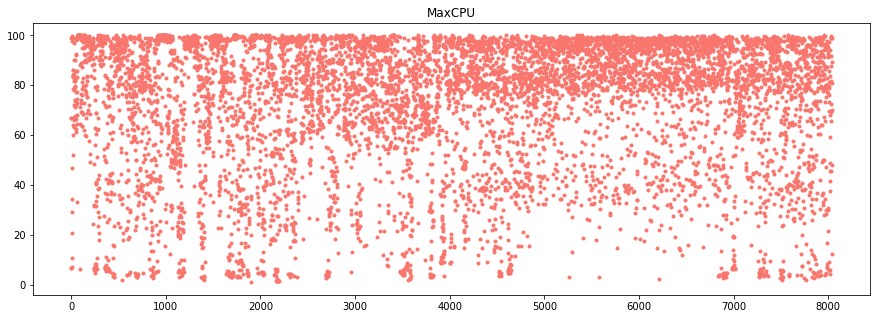

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
data['maxcpu'].plot(style='.', figsize=(15,5), color=color_pal[0], title='MaxCPU')
plt.show()

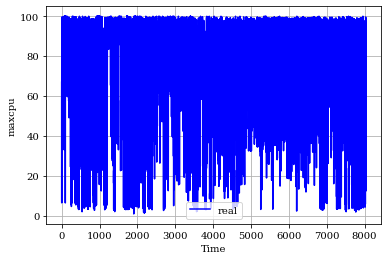

In [ ]:
plt.rc('font', family='serif')
plt.figure()
plt.grid()
plt.plot(data['maxcpu'], "-b", label="real")
# plt.plot(y_pred, "-r", label="pred")
plt.legend()
plt.xlabel("Time")
plt.ylabel("maxcpu")
#plt.savefig('original.png', format='png', dpi=720)
plt.show()

In [ ]:
data.head()

,maxcpu,Timestamp
0,66.909246,2020-01-01 00:00:00
1,6.510768,2020-01-01 01:00:00
2,66.956558,2020-01-01 02:00:00
3,98.795780,2020-01-01 03:00:00
4,6.472197,2020-01-01 04:00:00


In [ ]:
data = data.set_index("Timestamp")

In [ ]:
data = data.reset_index()

In [ ]:
data.head()

,Timestamp,maxcpu
0,2020-01-01 00:00:00,66.909246
1,2020-01-01 01:00:00,6.510768
2,2020-01-01 02:00:00,66.956558
3,2020-01-01 03:00:00,98.795780
4,2020-01-01 04:00:00,6.472197


In [ ]:
# the other implementation using tensorflow datasets

In [ ]:
data.to_csv("/tmp/cleaned_data.csv")

In [ ]:
df = data["maxcpu"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

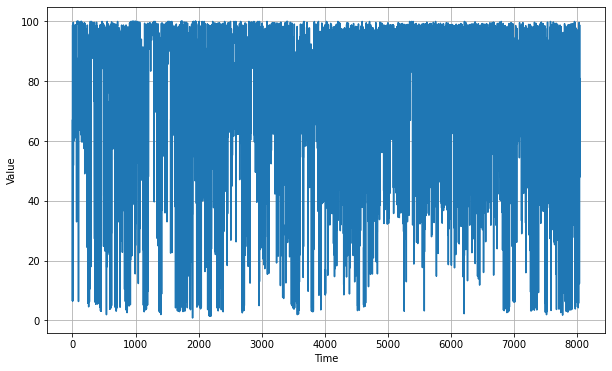

In [ ]:
import csv
time_step = []
maxcpu = []

with open('/tmp/cleaned_data.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    maxcpu.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

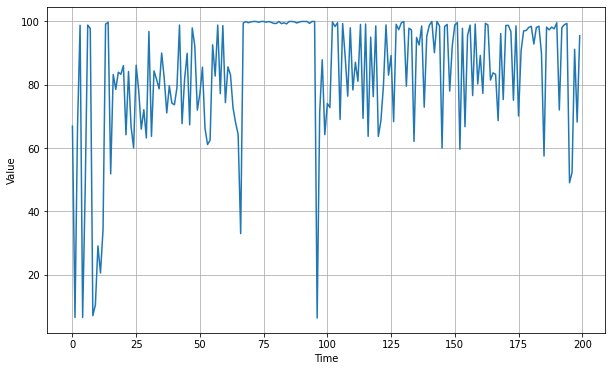

In [ ]:
series = np.array(maxcpu)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series, start=0, end=200)

In [ ]:
split_time = 7000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

#window_size = 48
#batch_size = 32
shuffle_buffer_size = 1000


In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 48
batch_size = 128
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(7000,)
Epoch 1/100
55/55 [==============================] - 1s 17ms/step - loss: 54.6942 - mae: 55.1931
Epoch 2/100
55/55 [==============================] - 1s 19ms/step - loss: 42.0613 - mae: 42.5597
Epoch 3/100
55/55 [==============================] - 1s 17ms/step - loss: 32.1985 - mae: 32.6970
Epoch 4/100
55/55 [==============================] - 1s 18ms/step - loss: 25.2962 - mae: 25.7933
Epoch 5/100
55/55 [==============================] - 1s 17ms/step - loss: 21.8769 - mae: 22.3724
Epoch 6/100
55/55 [==============================] - 1s 19ms/step - loss: 20.9309 - mae: 21.4258
Epoch 7/100
55/55 [==============================] - 1s 19ms/step - loss: 20.7361 - mae: 21.2309
Epoch 8/100
55/55 [==============================] - 1s 18ms/step - loss: 20.6531 - mae: 21.1476
Epoch 9/100
55/55 [==============================] - 1s 21ms/step - loss: 20.5820 - mae: 21.0763
Epoch 10/100
55/55 [=====

(1e-08, 0.0001, 0.0, 60.0)

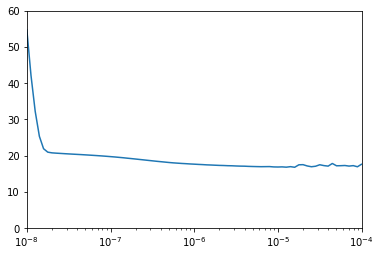

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=100, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
69/69 [==============================] - 1s 20ms/step - loss: 21.0825 - mse: 897.4161
Epoch 2/500
69/69 [==============================] - 1s 22ms/step - loss: 17.8516 - mse: 626.6744
Epoch 3/500
69/69 [==============================] - 2s 22ms/step - loss: 17.6155 - mse: 617.6527
Epoch 4/500
69/69 [==============================] - 2s 23ms/step - loss: 17.4643 - mse: 611.8906
Epoch 5/500
69/69 [==============================] - 2s 23ms/step - loss: 17.3278 - mse: 604.2977
Epoch 6/500
69/69 [==============================] - 1s 22ms/step - loss: 17.1830 - mse: 601.0796
Epoch 7/500
69/69 [==============================] - 1s 21ms/step - loss: 17.1309 - mse: 598.6849
Epoch 8/500
69/69 [==============================] - 1s 21ms/step - loss: 17.0167 - mse: 596.3602
Epoch 9/500
69/69 [==============================] - 2s 22ms/step - loss: 16.9507 - mse: 595.3961
Epoch 10/500
69/69 [==============================] - 2s 23ms/step - loss: 16.9268 - mse: 593.4194
Epoch 11/500
69/69 

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [ ]:
rnn_forecast.shape

(1040,)

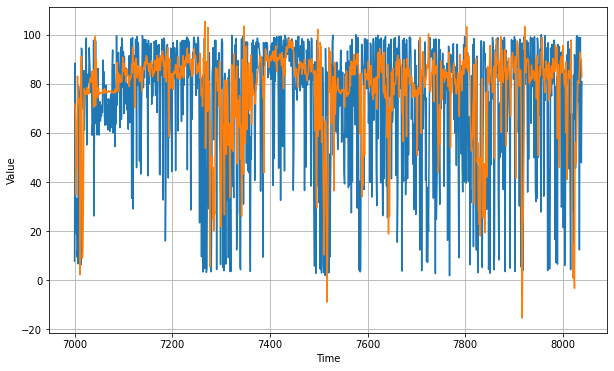

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

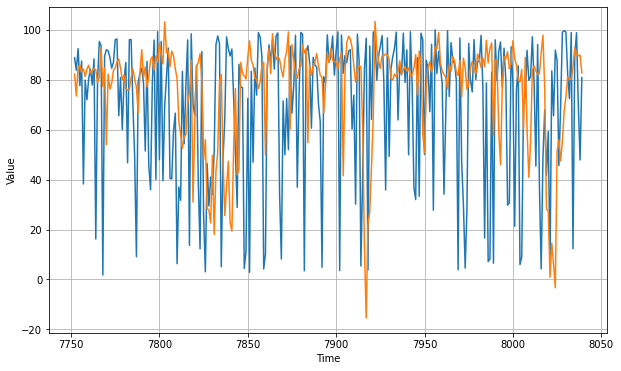

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[-288:], x_valid[-288:])
plot_series(time_valid[-288:], rnn_forecast[-288:])

In [ ]:
training_size = int(len(df)*0.8)


In [ ]:
train_data = df.loc[0:training_size].values
test_data = df.loc[training_size+1:len(df)].values

In [ ]:
len(train_data)
print("train_data shape = {}".format(train_data.shape))

train_data shape = (6433,)


In [ ]:
len(test_data)
print("test_data shape = {}".format(test_data.shape))

test_data shape = (1607,)


In [ ]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
def create_dataset(dataset, timestep=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-timestep):
    a = dataset[i:(i+timestep), :1]
    dataX.append(a)
    dataY.append(dataset[i+timestep, :1])
  return np.array(dataX), np.array(dataY)


In [ ]:
timestep=24
Xtrain, ytrain = create_dataset(train_data, timestep)
Xtest, ytest = create_dataset(test_data, timestep)

In [ ]:
print("Xtrain shape = {}".format(Xtrain.shape))
print("ytrain shape = {}".format(ytrain.shape))
print("Xtest shape = {}".format(Xtest.shape))
print("ytest shape = {}".format(ytest.shape))

Xtrain shape = (6409, 24, 1)
ytrain shape = (6409, 1)
Xtest shape = (1583, 24, 1)
ytest shape = (1583, 1)


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
tensorflow.get_logger().setLevel('ERROR')

tensorflow.keras.backend.clear_session()

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False)),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[lr_schedule])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 41,729
Trainable params: 41,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), callbacks=[lr_schedule], batch_size=64)

Epoch 1/100
101/101 [==============================] - 6s 56ms/step - loss: 169.5418 - mse: 29761.7500 - val_loss: 160.7171 - val_mse: 26809.1270
Epoch 2/100
101/101 [==============================] - 4s 39ms/step - loss: 149.0359 - mse: 23138.8809 - val_loss: 140.0002 - val_mse: 20546.5273
Epoch 3/100
101/101 [==============================] - 4s 40ms/step - loss: 126.4791 - mse: 16866.8789 - val_loss: 116.8591 - val_mse: 14593.9316
Epoch 4/100
101/101 [==============================] - 4s 40ms/step - loss: 101.3022 - mse: 11108.5391 - val_loss: 91.2118 - val_mse: 9284.7490
Epoch 5/100
101/101 [==============================] - 4s 39ms/step - loss: 74.9034 - mse: 6469.1865 - val_loss: 65.4042 - val_mse: 5238.8306
Epoch 6/100
101/101 [==============================] - 4s 40ms/step - loss: 49.5990 - mse: 3226.5212 - val_loss: 42.3050 - val_mse: 2525.3013
Epoch 7/100
101/101 [==============================] - 4s 40ms/step - loss: 29.9231 - mse: 1470.1648 - val_loss: 28.5253 - val_mse: 13

KeyboardInterrupt: ignored